<a href="https://colab.research.google.com/github/SRINI-J/Object_detection/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
import google
from google.colab.patches import cv2_imshow


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 79.5MB/s]


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
img = Image.open("/content/key_frame_2139.jpg")

In [ ]:
transform = T.ToTensor()
image = transform(img)

In [ ]:
with torch.no_grad():
  pred = model([image])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes , labels , scores = pred[0]["boxes"] , pred[0]["labels"] , pred[0]["scores"]

In [ ]:
bboxes

tensor([[1256.6189,  455.5069, 1702.0627, 1089.0638],
        [1243.7700,  886.9078, 1669.9706, 1074.9060],
        [1045.2777,  901.1140, 1230.6364, 1004.9979],
        [ 365.6481, 1101.8920,  626.3187, 1190.5723],
        [ 363.4394,  896.6995,  701.8044, 1197.4800],
        [1247.6841,  894.5347, 1640.1912, 1071.4264],
        [ 347.9149, 1019.0215,  642.9659, 1200.5433],
        [ 634.1925,  963.7064,  891.0509, 1209.1681],
        [ 580.0344,  944.9014,  878.0112, 1228.8508],
        [1237.1372,  901.5733, 1397.2043, 1025.0619],
        [1045.5358, 1009.7550, 1110.5957, 1080.1173],
        [1037.4871,  928.7433, 1153.0813, 1008.3760],
        [ 831.4496,  948.8400,  893.1414, 1000.1600],
        [1067.7992, 1010.2198, 1106.5894, 1066.9208],
        [1057.7871,  928.3360, 1115.9528,  990.2929],
        [ 954.4678,  932.0355, 1242.5881, 1011.9203],
        [ 371.7417,  950.0716,  821.0904, 1200.2966],
        [1153.7029,  922.2035, 1239.2601, 1003.0763],
        [ 651.6711,  974.850

In [ ]:
labels

tensor([8, 8, 3, 9, 9, 3, 9, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3])

In [ ]:
scores

tensor([0.9414, 0.9011, 0.7615, 0.6133, 0.5319, 0.3417, 0.2334, 0.2225, 0.1855,
        0.1339, 0.1194, 0.0952, 0.0914, 0.0836, 0.0772, 0.0729, 0.0685, 0.0654,
        0.0601, 0.0561])

In [ ]:
num = torch.argwhere(scores > 0.5).shape[0]

In [ ]:
num

5

In [ ]:
 label_name =["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_DUPLEX

In [ ]:
igg = cv2.imread("/content/key_frame_2139.jpg")
for i in range(num):
    x1 , y1 , x2 ,y2 = bboxes[i].numpy().astype("int")
    # print(x1 , y1 , x2 , y2)
    # break
    igg = cv2.rectangle(igg , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 2)
    class_name = label_name[labels.numpy()[i] - 1]
    igg = cv2.putText(igg , class_name , (x1 , y1 -10), font , 1.0 , ( 255 , 255 , 0), 2 , cv2.LINE_AA)

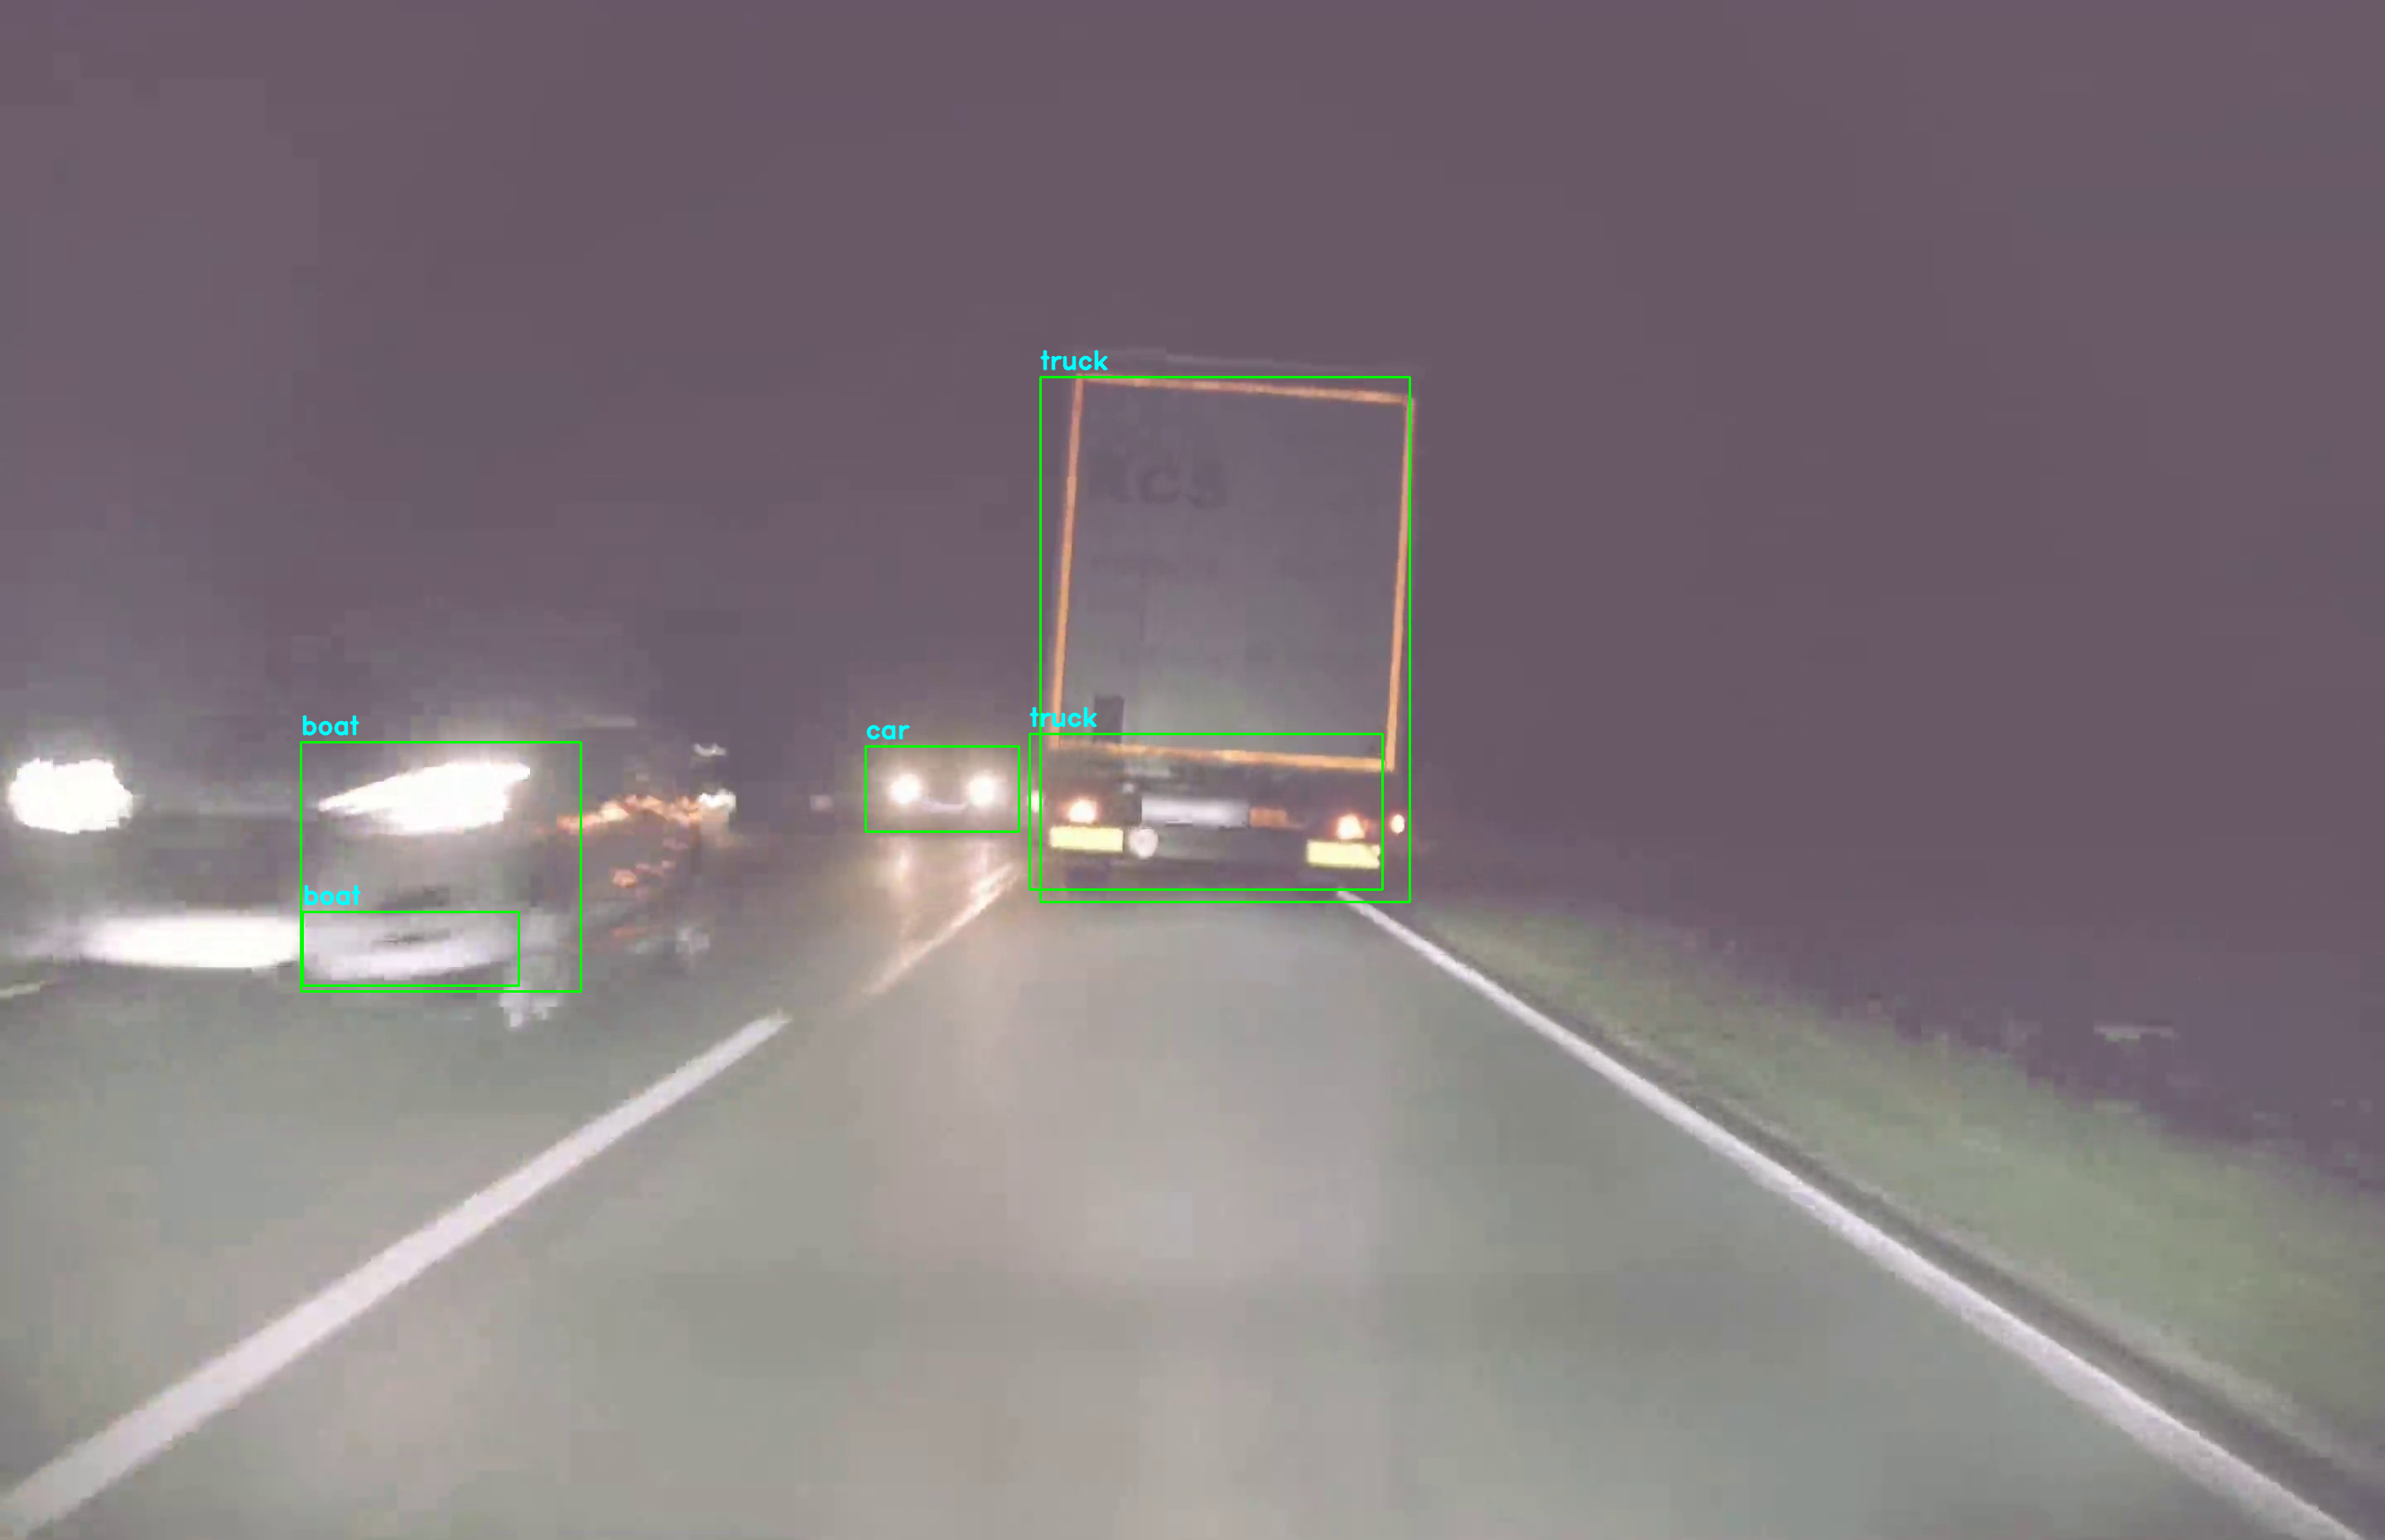

In [ ]:
cv2_imshow(igg)